<a href="https://colab.research.google.com/github/attilalr/plot-roc-curve-cv/blob/main/Plot_roc_curve_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from cycler import cycler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [11]:
# Download plot_roc_curve if necessary
plot_roc_curve_filepath = 'https://raw.githubusercontent.com/attilalr/plot-roc-curve-cv/main/plot_roc_curve.py'

if not os.path.isfile('plot_roc_curve.py'):
    !wget -d {plot_roc_curve_filepath}

# now lets load the function
from plot_roc_curve import plot_roc_curve

In [3]:
# Lets change the default mpl style

# pyplot style, took from https://www.youtube.com/watch?v=OjPHx2-Bo6k&t=2s
dict_pyplot_style = {}

dict_pyplot_style['font.size'] = 14
dict_pyplot_style['font.family'] = 'STIXGeneral'
dict_pyplot_style['mathtext.fontset'] = 'stix'

# Remove padding
dict_pyplot_style['figure.constrained_layout.use'] = True
dict_pyplot_style['figure.constrained_layout.h_pad'] = 0.005
dict_pyplot_style['figure.constrained_layout.w_pad'] = 0.005
dict_pyplot_style['figure.constrained_layout.hspace'] = 0.005
dict_pyplot_style['figure.constrained_layout.wspace'] = 0.005

# Change ticks to face in instead of out
dict_pyplot_style['xtick.direction'] = 'in'
dict_pyplot_style['ytick.direction'] = 'in'

# Change color cycle
dict_pyplot_style['axes.prop_cycle'] = cycler('color',
                                              ['#0077BB',
                                               '#33BBEE',
                                               '#009988',
                                               '#EE7733',
                                               '#CC3311',
                                               '#EE3377',
                                               '#BBBBBB'],
                                              )

# Remove Legend box
dict_pyplot_style['legend.frameon'] = False
dict_pyplot_style['legend.fontsize'] = 6

dict_pyplot_style['legend.fontsize'] = 10
dict_pyplot_style['legend.handlelength'] = 2

In [4]:
# Test with some data

n_samples = 1200
n_classes = 2

# Random seed
seed = int(time.time())
rng = np.random.RandomState(seed)

X, y = make_classification(n_samples=n_samples, n_classes=n_classes,
                           n_features=9, n_informative=3,
                           n_clusters_per_class=1, class_sep=0.4,
                           scale=None,
                           shift=None,
                           shuffle=True,
                           )

In [5]:
clf = RandomForestClassifier()

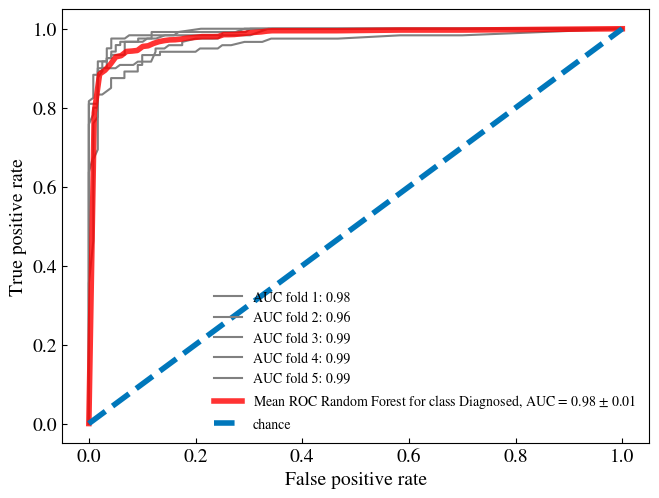

In [6]:
plot_roc_curve(X, y,
               clf,
               clf_label='Random Forest',
               target_column=1, # for binary is the usual
               class_name='Diagnosed',
               cv=5,
               show_fold_curves=True, show_fold_scores=True,
               figsize=(8, 6),
               dict_pyplot_style=dict_pyplot_style,
               )


Let's initialize another model

In [7]:
clf2 = LogisticRegression()

Let's test with two ROC curves / two models

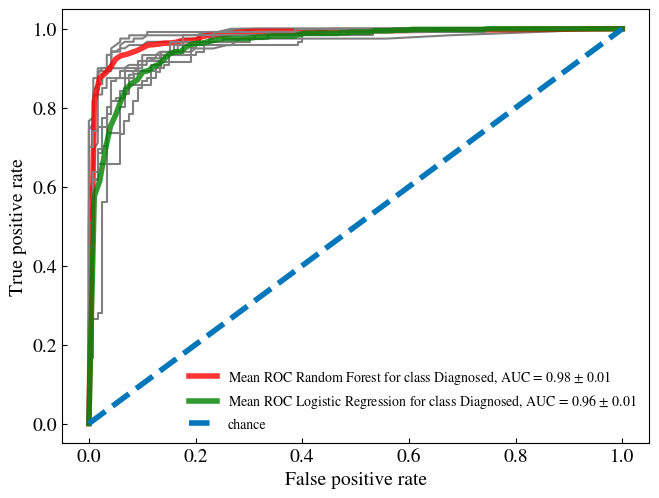

In [8]:
fig = plot_roc_curve(X, y,
               clf,
               clf_label='Random Forest',
               target_column=1, # for binary is the usual
               class_name='Diagnosed',
               cv=5,
               show_fold_curves=True, show_fold_scores=False,
               plot_chance_curve=False,
               figsize=(8, 6),
               dict_pyplot_style=dict_pyplot_style,
               return_fig=True,
               )

plot_roc_curve(X, y,
               clf2,
               clf_label='Logistic Regression',
               target_column=1, # for binary is the usual
               class_name='Diagnosed',
               color_mean_roc_curve='g',
               cv=5,
               show_fold_curves=True, show_fold_scores=False,
               figsize=(8, 6),
               dict_pyplot_style=dict_pyplot_style,
               return_fig=False,
               fig=fig
               )